In [15]:
import pandas as pd


In [16]:
food_data=pd.read_csv("D:/Deep_Learning/Nutrition.csv",encoding="ISO-8859-1")

In [ ]:
food_data.head(50)

In [17]:
new_food_data = food_data[[ 'ID','FoodGroup', 'ShortDescrip','Descrip','Energy_kcal']].copy()

In [18]:
new_food_data.head()

,ID,FoodGroup,ShortDescrip,Descrip,Energy_kcal
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",717.0
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",717.0
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",876.0
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",353.0
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",371.0


In [19]:
new_food_data.tail()
new_food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 5 columns):
ID              8618 non-null int64
FoodGroup       8618 non-null object
ShortDescrip    8618 non-null object
Descrip         8618 non-null object
Energy_kcal     8618 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 336.8+ KB


In [21]:
print(new_food_data.groupby('FoodGroup').count())

                                      ID  ShortDescrip  Descrip  Energy_kcal
FoodGroup                                                                   
American Indian/Alaska Native Foods  165           165      165          165
Baby Foods                           362           362      362          362
Baked Products                       797           797      797          797
Beef Products                        946           946      946          946
Beverages                            315           315      315          315
Breakfast Cereals                    363           363      363          363
Cereal Grains and Pasta              183           183      183          183
Dairy and Egg Products               264           264      264          264
Fast Foods                           371           371      371          371
Fats and Oils                        219           219      219          219
Finfish and Shellfish Products       267           267      267          267

In [3]:
import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
import tensorflow.keras.backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
#import cv2

In [2]:
# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

2.1.0



In [23]:
# Helper function to download data and extract
def get_data_extract():
  if "food-101" in os.listdir():
    print("Dataset already exists")
  else:
    print("Downloading the data...")
    !wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
    print("Dataset downloaded!")
    print("Extracting data..")
    !tar xzvf food-101.tar.gz
    print("Extraction done!")

In [24]:
get_data_extract()

Dataset downloaded!
Extracting data..


'wget' is not recognized as an internal or external command,
operable program or batch file.


Extraction done!


tar: Error opening archive: Failed to open 'food-101.tar.gz'


In [25]:
os.listdir('D:/Deep_Learning/food-101/food-101/images')

['.DS_Store',
 'apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'chapati',
 'chapati.rar',
 'chapati.zip',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummu

In [26]:
os.listdir('D:/Deep_Learning/food-101/food-101/meta')

['classes.txt',
 'labels.txt',
 'test.json',
 'test.txt',
 'train.json',
 'train.txt']

NotADirectoryError: [WinError 267] The directory name is invalid: 'D:/Deep_Learning/food-101/food-101/images/Paneer.rar'

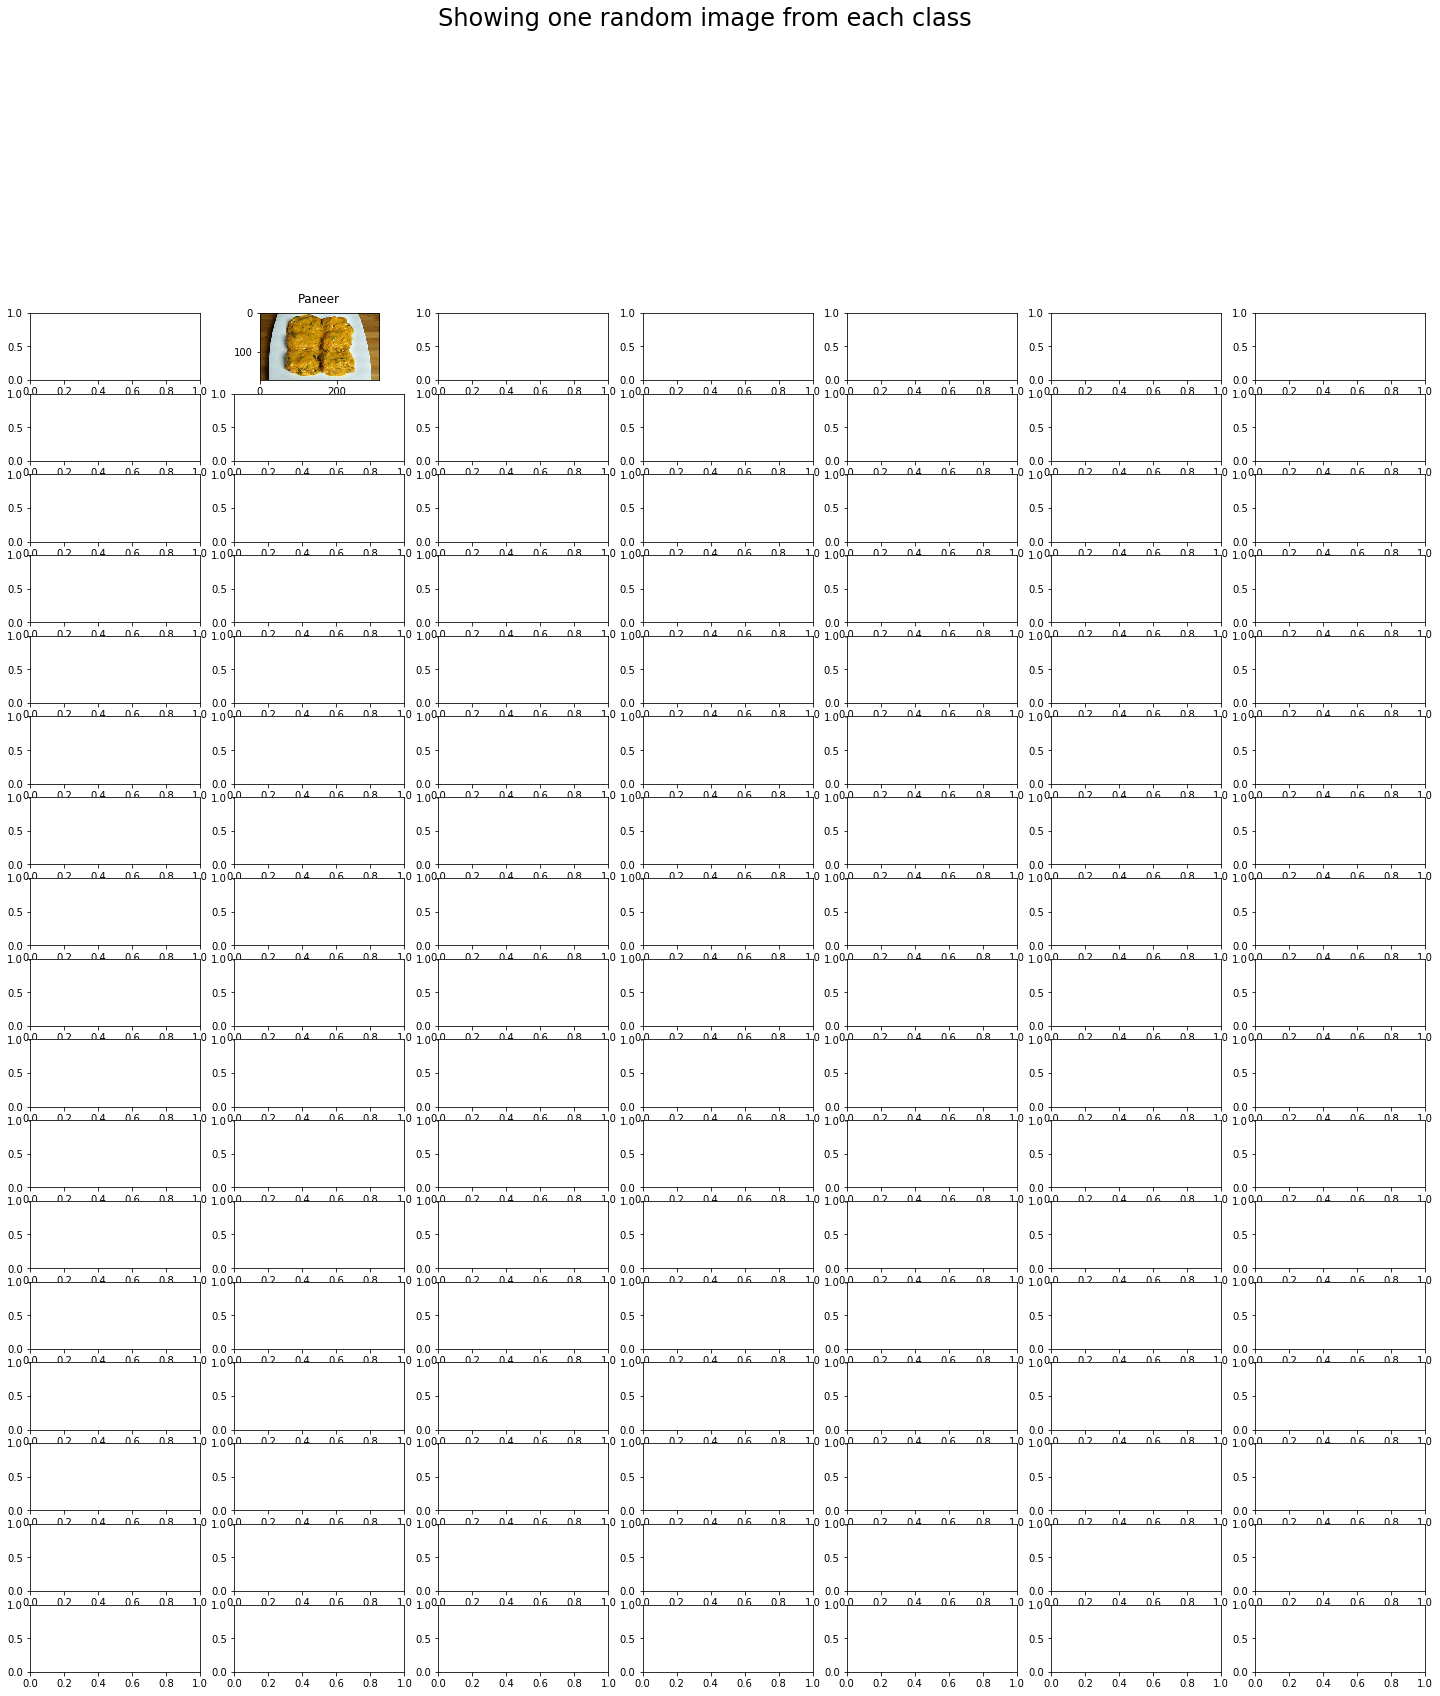

In [8]:
# Visualize the data, showing one image per class from 101 classes
rows = 17
cols = 7
fig, ax = plt.subplots(rows, cols, figsize=(25,25))
fig.suptitle("Showing one random image from each class", y=1.05, fontsize=24) # Adding  y=1.05, fontsize=24 helped me fix the suptitle overlapping with axes issue
data_dir = "D:/Deep_Learning/food-101/food-101/images/"
foods_sorted = sorted(os.listdir(data_dir))
food_id = 0
for i in range(rows):
  for j in range(cols):
    try:
      food_selected = foods_sorted[food_id] 
      food_id += 1
    except:
      break
    if food_selected == '.DS_Store':
        continue
    food_selected_images = os.listdir(os.path.join(data_dir,food_selected)) # returns the list of all files present in each food category
    food_selected_random = np.random.choice(food_selected_images) # picks one food item from the list as choice, takes a list and returns one random item
    img = plt.imread(os.path.join(data_dir,food_selected, food_selected_random))
    ax[i][j].imshow(img)
    ax[i][j].set_title(food_selected, pad = 10)
    
plt.setp(ax, xticks=[],yticks=[])
plt.tight_layout()

In [4]:
def prepare_data(filepath, src,dest):
  classes_images = defaultdict(list)
  with open(filepath, 'r') as txt:
      paths = [read.strip() for read in txt.readlines()]
      for p in paths:
        food = p.split('/')
        classes_images[food[0]].append(food[1] + '.jpg')

  for food in classes_images.keys():
    print("\nCopying images into ",food)
    if not os.path.exists(os.path.join(dest,food)):
      os.makedirs(os.path.join(dest,food))
    for i in classes_images[food]:
      copy(os.path.join(src,food,i), os.path.join(dest,food,i))
  print("Copying Done!")

In [5]:
# Prepare train dataset by copying images from food-101/images to food-101/train using the file train.txt
%cd /
print("Creating train data...")
prepare_data('D:/Deep_Learning/food-101/food-101/meta/train.txt', 'D:/Deep_Learning/food-101/food-101/images', 'train')

C:\
Creating train data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  chapati

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying ima

In [6]:
# Prepare test data by copying images from food-101/images to food-101/test using the file test.txt
print("Creating test data...")
prepare_data('D:/Deep_Learning/food-101/food-101/meta/test.txt', 'D:/Deep_Learning/food-101/food-101/images', 'test')

Creating test data...

Copying images into  apple_pie

Copying images into  baby_back_ribs

Copying images into  baklava

Copying images into  beef_carpaccio

Copying images into  beef_tartare

Copying images into  beet_salad

Copying images into  beignets

Copying images into  bibimbap

Copying images into  bread_pudding

Copying images into  breakfast_burrito

Copying images into  bruschetta

Copying images into  caesar_salad

Copying images into  cannoli

Copying images into  caprese_salad

Copying images into  carrot_cake

Copying images into  ceviche

Copying images into  chapati

Copying images into  cheesecake

Copying images into  cheese_plate

Copying images into  chicken_curry

Copying images into  chicken_quesadilla

Copying images into  chicken_wings

Copying images into  chocolate_cake

Copying images into  chocolate_mousse

Copying images into  churros

Copying images into  clam_chowder

Copying images into  club_sandwich

Copying images into  crab_cakes

Copying images i

In [ ]:
# Check how many files are in the train folder
print("Total number of samples in train folder")
!find train -type d -or -type f -printf '.' | wc -c

In [9]:
del foods_sorted[0] # remove .DS_Store from the list

In [10]:
print(foods_sorted)


['Paneer', 'Paneer.rar', 'Paneer.zip', 'apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'chapati', 'chapati.rar', 'chapati.zip', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster

In [11]:
def dataset_mini(food_list, src, dest):
  if os.path.exists(dest):
    rmtree(dest) # removing dataset_mini(if it already exists) folders so that we will have only the classes that we want
  os.makedirs(dest)
  for food_item in food_list :
    print("Copying images into",food_item)
    copytree(os.path.join(src,food_item), os.path.join(dest,food_item))
 

In [14]:
# picking 3 food items and generating separate data folders for the same
food_list = ['apple_pie','pizza','omelette']
src_train = 'train'
dest_train = 'train_mini'
src_test = 'test'
dest_test = 'test_mini'

In [14]:
print("Creating train data folder with new classes")
dataset_mini(food_list, src_train, dest_train)

Creating train data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [24]:
print("Total number of samples in train folder")

!find train_mini -type d -or -type f -printf '.' | wc -c

Total number of samples in train folder


'wc' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
print("Creating test data folder with new classes")
dataset_mini(food_list, src_test, dest_test)

Creating test data folder with new classes
Copying images into apple_pie
Copying images into pizza
Copying images into omelette


In [27]:
K.clear_session()
n_classes = 3
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(3,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


history_11class = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=30,
                    verbose=1)

Found 2250 images belonging to 3 classes.
Found 750 images belonging to 3 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 140 steps, validate for 46 steps
Epoch 1/30
140/140 [==============================] - 646s 5s/step - loss: 1.0958 - accuracy: 0.4311 - val_loss: 0.8533 - val_accuracy: 0.6984
Epoch 2/30
140/140 [==============================] - 622s 4s/step - loss: 0.8563 - accuracy: 0.6607 - val_loss: 0.6615 - val_accuracy: 0.8139
Epoch 3/30
140/140 [==============================] - 622s 4s/step - loss: 0.6867 - accuracy: 0.7574 - val_loss: 0.5313 - val_accuracy: 0.8560
Epoch 4/30
140/140 [==============================] - 931s 7s/step - loss: 0.5661 - accuracy: 0.8147 - val_loss: 0.4362 - val_accuracy: 0.8750
Epoch 5/30
140/140 [==============================] - 631s 5s/step - loss: 0.4832 - accuracy: 0.8469 - val_loss: 0.3610 - val_accuracy: 0.9062
Epoch 6/30
140/140 [=============

In [41]:
model.save('D:/Deep_Learning/my_model.hdf5') 

In [42]:
class_map_3 = train_generator.class_indices
class_map_3

{'apple_pie': 0, 'omelette': 1, 'pizza': 2}

In [43]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

In [ ]:
plot_accuracy(history_11class,'FOOD101-Inceptionv3')
plot_loss(history_11class,'FOOD101-Inceptionv3')


In [17]:
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('D:/Deep_Learning/my_model.hdf5',compile = False)

In [33]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

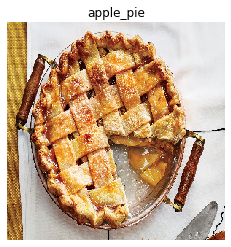

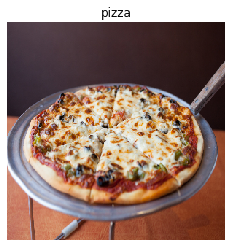

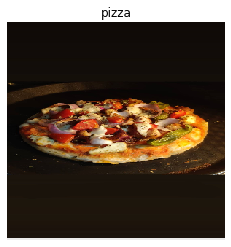

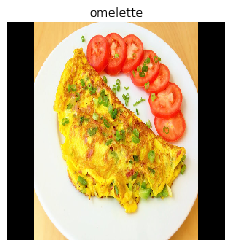

In [21]:
# Make a list of downloaded images and test the trained model
images = []
images.append('D:/Deep_Learning/food-101/food-101/images/apple_pie/applepie.jpg')
images.append('D:/Deep_Learning/food-101/food-101/images/pizza/pizza.jpg')
images.append('D:/Deep_Learning/food-101/food-101/images/pizza/swapnilpizza.jpg')
images.append('D:/Deep_Learning/food-101/food-101/images/omelette/omelette.jpg')
predict_class(model_best, images, True)

In [30]:
n = 2
food_list1=['chapati','Paneer']
print("These are the randomly picked food classes we will be training the model on...\n", food_list1)

These are the randomly picked food classes we will be training the model on...
 ['chapati', 'Paneer']


In [28]:
print("Creating training data folder with new classes...")
dataset_mini(food_list1, src_train, dest_train)

Creating training data folder with new classes...
Copying images into chapati
Copying images into Paneer


In [29]:
print("Creating test data folder with new classes")
dataset_mini(food_list1, src_test, dest_test)

Creating test data folder with new classes
Copying images into chapati
Copying images into Paneer


In [31]:
# Let's use a pretrained Inceptionv3 model on subset of data with 11 food classes
K.clear_session()

n_classes = n
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 40 #75750
nb_validation_samples = 10 #25250
batch_size = 2

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])


history_11class = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1)



Found 40 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 20 steps, validate for 5 steps
Epoch 1/10
20/20 [==============================] - 28s 1s/step - loss: 0.8149 - accuracy: 0.3250 - val_loss: 0.7301 - val_accuracy: 0.6000
Epoch 2/10
20/20 [==============================] - 15s 769ms/step - loss: 0.6641 - accuracy: 0.6250 - val_loss: 0.6753 - val_accuracy: 0.6000
Epoch 3/10
20/20 [==============================] - 15s 774ms/step - loss: 0.6308 - accuracy: 0.7000 - val_loss: 0.6618 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 15s 761ms/step - loss: 0.5783 - accuracy: 0.7250 - val_loss: 0.6442 - val_accuracy: 0.5000
Epoch 5/10
20/20 [==============================] - 16s 799ms/step - loss: 0.5140 - accuracy: 0.8250 - val_loss: 0.6413 - val_accuracy: 0.6000
Epoch 6/10
20/20 [==============================] - 16s 783ms/step - loss: 0.4964 - accuracy: 0.8000 - val_loss: 0.64

OSError: Unable to create file (unable to open file: name = 'model_trained_11class.hdf5', errno = 13, error message = 'Permission denied', flags = 13, o_flags = 302)

In [37]:

model.save('D:/Deep_Learning/model_trained_11class.hdf5') 
model_best = load_model('D:/Deep_Learning/model_trained_11class.hdf5',compile = False)

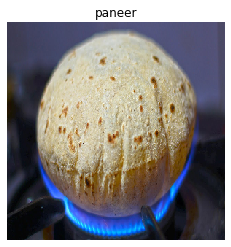

In [42]:
images = []
images.append('D:/chapati12.jpg')

predict_class(model_best, images, True)

In [12]:
n = 101
food_sorted1=['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_soup', 'mussels', 'nachos', 'omelette', 'onion_rings', 'oysters', 'pad_thai', 'paella', 'pancakes', 'panna_cotta', 'peking_duck', 'pho', 'pizza', 'pork_chop', 'poutine', 'prime_rib', 'pulled_pork_sandwich', 'ramen', 'ravioli', 'red_velvet_cake', 'risotto', 'samosa', 'sashimi', 'scallops', 'seaweed_salad', 'shrimp_and_grits', 'spaghetti_bolognese', 'spaghetti_carbonara', 'spring_rolls', 'steak', 'strawberry_shortcake', 'sushi', 'tacos', 'takoyaki', 'tiramisu', 'tuna_tartare', 'waffles']
print("These are the randomly picked food classes we will be training the model on...\n", food_sorted1)

These are the randomly picked food classes we will be training the model on...
 ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobste

In [22]:
print("Creating training data folder with new classes...")
dataset_mini(food_sorted1, src_train, dest_train)

Creating training data folder with new classes...
Copying images into apple_pie


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'train\\apple_pie'

In [23]:
print("Creating test data folder with new classes")
dataset_mini(food_sorted1, src_test, dest_test)

Creating test data folder with new classes
Copying images into apple_pie


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'test\\apple_pie'

In [24]:
# Let's use a pretrained Inceptionv3 model on subset of data with 11 food classes
K.clear_session()

n_classes = n
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
validation_data_dir = 'test_mini'
nb_train_samples = 75750
nb_validation_samples = 25250
batch_size = 100

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False,input_shape=(299,299,3))
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(n,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.01, momentum=0.92), loss='categorical_crossentropy', metrics=['accuracy'])
history_11class = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=10,
                    verbose=1,
                    )



Found 0 images belonging to 0 classes.


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'test_mini'

In [43]:
n = 101
food_list = ['hamburger',
 'ice_cream',
 'club_sandwich',
 'risotto',
 'hot_and_sour_soup',
 'waffles',
 'greek_salad',
 'cup_cakes',
 'steak',
 'paella',
 'escargots',
 'deviled_eggs',
 'clam_chowder',
 'eggs_benedict',
 'seaweed_salad',
 'hummus',
 'sushi',
 'beignets',
 'lasagna',
 'pancakes',
 'baklava',
 'guacamole',
 'grilled_salmon',
 'mussels',
 'ramen',
 'caesar_salad',
 'lobster_bisque',
 'pad_thai',
 'macarons',
 'edamame',
 'filet_mignon',
 'samosa',
 'macaroni_and_cheese',
 'bibimbap',
 'crab_cakes',
 'ravioli',
 'omelette',
 'dumplings',
 'chicken_wings',
 'red_velvet_cake',
 'foie_gras',
 'peking_duck',
 'cheese_plate',
 'fried_rice',
 'cannoli',
 'tuna_tartare',
 'creme_brulee',
 'french_fries',
 'onion_rings',
 'grilled_cheese_sandwich',
 'chicken_quesadilla',
 'strawberry_shortcake',
 'french_onion_soup',
 'sashimi',
 'baby_back_ribs',
 'garlic_bread',
 'poutine',
 'pho',
 'carrot_cake',
 'bruschetta',
 'nachos',
 'croque_madame',
 'caprese_salad',
 'chocolate_mousse',
 'beef_carpaccio',
 'shrimp_and_grits',
 'huevos_rancheros',
 'frozen_yogurt',
 'fish_and_chips',
 'oysters',
 'ceviche',
 'prime_rib',
 'hot_dog',
 'gnocchi',
 'cheesecake',
 'spaghetti_bolognese',
 'french_toast',
 'scallops',
 'pulled_pork_sandwich',
 'pork_chop',
 'churros',
 'apple_pie',
 'gyoza',
 'fried_calamari',
 'miso_soup',
 'spaghetti_carbonara',
 'spring_rolls',
 'takoyaki',
 'beef_tartare',
 'bread_pudding',
 'lobster_roll_sandwich',
 'beet_salad',
 'pizza',
 'donuts',
 'chocolate_cake',
 'chicken_curry',
 'breakfast_burrito',
 'tacos',
 'tiramisu',
 'panna_cotta',
 'falafel']
print("These are the randomly picked food classes we will be training the model on...\n", food_list)

These are the randomly picked food classes we will be training the model on...
 ['hamburger', 'ice_cream', 'club_sandwich', 'risotto', 'hot_and_sour_soup', 'waffles', 'greek_salad', 'cup_cakes', 'steak', 'paella', 'escargots', 'deviled_eggs', 'clam_chowder', 'eggs_benedict', 'seaweed_salad', 'hummus', 'sushi', 'beignets', 'lasagna', 'pancakes', 'baklava', 'guacamole', 'grilled_salmon', 'mussels', 'ramen', 'caesar_salad', 'lobster_bisque', 'pad_thai', 'macarons', 'edamame', 'filet_mignon', 'samosa', 'macaroni_and_cheese', 'bibimbap', 'crab_cakes', 'ravioli', 'omelette', 'dumplings', 'chicken_wings', 'red_velvet_cake', 'foie_gras', 'peking_duck', 'cheese_plate', 'fried_rice', 'cannoli', 'tuna_tartare', 'creme_brulee', 'french_fries', 'onion_rings', 'grilled_cheese_sandwich', 'chicken_quesadilla', 'strawberry_shortcake', 'french_onion_soup', 'sashimi', 'baby_back_ribs', 'garlic_bread', 'poutine', 'pho', 'carrot_cake', 'bruschetta', 'nachos', 'croque_madame', 'caprese_salad', 'chocolate_mo

In [35]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

In [36]:
model_best = load_model('Downloads/foodmodel.h5',compile = False)


OSError: SavedModel file does not exist at: Downloads/foodmodel.h5/{saved_model.pbtxt|saved_model.pb}

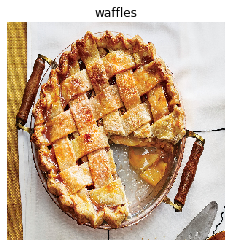

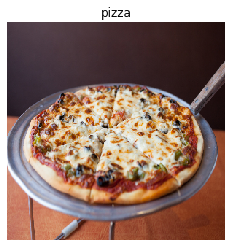

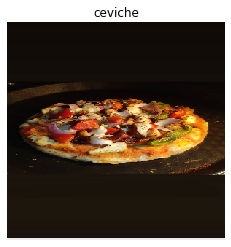

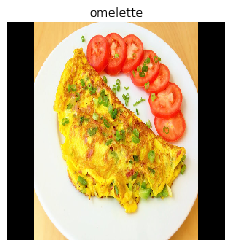

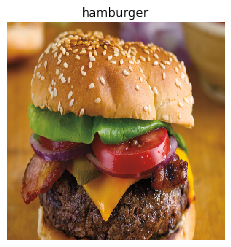

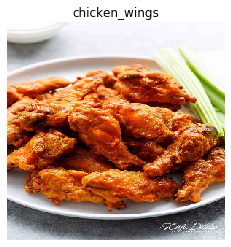

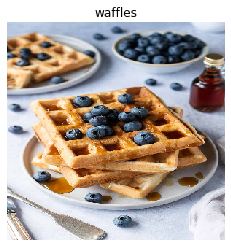

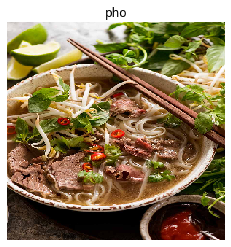

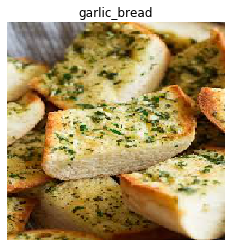

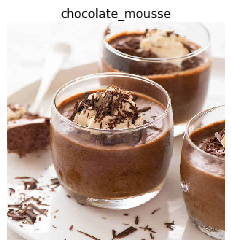

In [42]:
images = []
images.append('D:/Deep_Learning/food-101/food-101/images/apple_pie/applepie.jpg')
images.append('D:/Deep_Learning/food-101/food-101/images/pizza/pizza.jpg')
images.append('D:/Deep_Learning/food-101/food-101/images/pizza/swapnilpizza.jpg')
images.append('D:/Deep_Learning/food-101/food-101/images/omelette/omelette.jpg')
images.append('D:/Deep_Learning/random_images/hamburger.jpg')
images.append('D:/Deep_Learning/random_images/cw.jpg')
images.append('D:/Deep_Learning/random_images/w.jpg')
images.append('D:/Deep_Learning/random_images/pho.jpg')
images.append('D:/Deep_Learning/random_images/gb.jpg')
images.append('D:/Deep_Learning/random_images/cm.jpg')
predict_class(model_best, images, True)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import load_model
tf.keras.backend.set_learning_phase(0) 
model=load_model('D:/Deep_Learning/foodmodel.h5',compile = False)
model.layers[0] = Dense(32, input_shape=(299,299,3))
converter = tf.lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter = True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

tflite_model = converter.convert()

open("saved_model/converted_model.tflite", "wb").write(tflite_model)

ValueError: None is only supported in the 1st dimension. Tensor 'input_1' has invalid shape '[None, None, None, 3]'.

In [ ]:
model.summary()

In [23]:
model.input_shape

(None, None, None, 3)

In [8]:
model.output_shape

(None, 101)

In [28]:
import pandas as pd

In [73]:
food_data=pd.read_csv("D:/Deep_Learning/foodcalories.csv",encoding="ISO-8859-1")

In [74]:
food_data.head()

,name,calories_per_100g
0,apple_pie,52
1,baby_back_ribs,290
2,baklava,352
3,beef_carpaccio,232
4,beef_tartare,246


In [95]:
def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.                                      

    pred = model.predict(img)
    index = np.argmax(pred)
    food_list.sort()
    pred_value = food_list[index]
    calorie=food_data[food_data['name']==pred_value].calories_per_100g
    cal=str(calorie)
    cal1=cal.split(" ")
    cal2=cal1[4]
    pred_val="dish:"+pred_value+"      "+ "calories per 100g:"+cal2
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_val)
        plt.show()

In [87]:
model=load_model('D:/Deep_Learning/foodmodel.h5',compile = False)

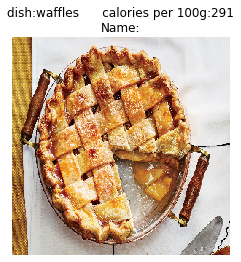

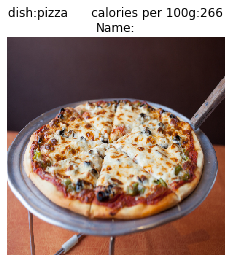

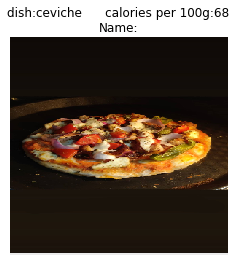

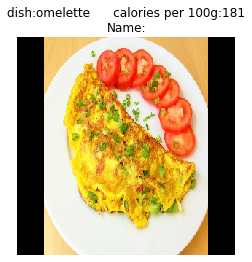

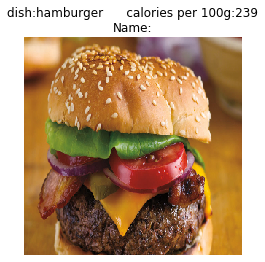

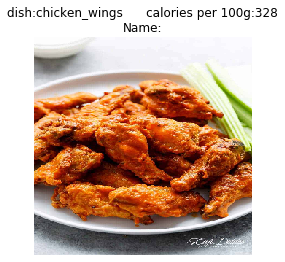

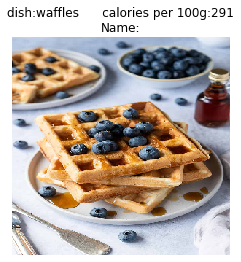

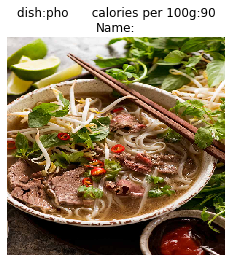

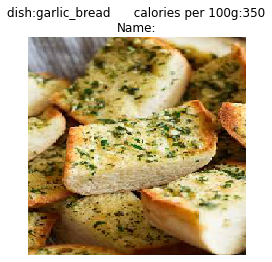

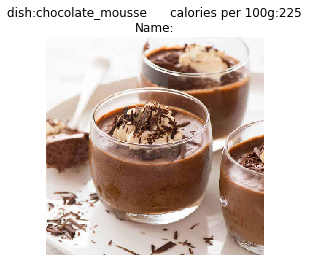

In [96]:
images = []
images.append('D:/Deep_Learning/food-101/food-101/images/apple_pie/applepie.jpg')
images.append('D:/Deep_Learning/food-101/food-101/images/pizza/pizza.jpg')
images.append('D:/Deep_Learning/food-101/food-101/images/pizza/swapnilpizza.jpg')
images.append('D:/Deep_Learning/food-101/food-101/images/omelette/omelette.jpg')
images.append('D:/Deep_Learning/random_images/hamburger.jpg')
images.append('D:/Deep_Learning/random_images/cw.jpg')
images.append('D:/Deep_Learning/random_images/w.jpg')
images.append('D:/Deep_Learning/random_images/pho.jpg')
images.append('D:/Deep_Learning/random_images/gb.jpg')
images.append('D:/Deep_Learning/random_images/cm.jpg')
predict_class(model, images, True)

PermissionError: [Errno 13] Permission denied: 'converted_model.tflite'

In [21]:
nb_train_samples = 75750
nb_validation_samples = 25250
batch_size = 100
n_classes = 101
img_width, img_height = 299, 299
train_data_dir = 'train_mini'
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'train_mini'